In [4]:
from sklearn.datasets import fetch_openml

In [6]:
mnist=fetch_openml('mnist_784',as_frame=False)

X,y=mnist.data,mnist.target
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

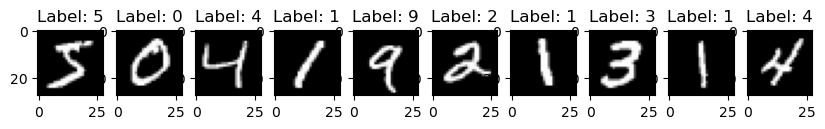

In [7]:
import matplotlib.pyplot as plt


def plot_samples(X, y, num_samples=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples,i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {y[i]}')
        plt.axis('ON')
    plt.show()


plot_samples(X, y, num_samples=10)

In [12]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality while preserving 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Check the new shape after applying PCA
print(f"New shape after PCA: {X_pca.shape}")

New shape after PCA: (70000, 154)


In [8]:
X=X/255
y = y.astype(int)
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 ... 4 5 6]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into training and testing sets (60,000 train, 10,000 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, train_size=60000, random_state=42)


In [11]:
# Example with SVM
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Example with Random Forest
#rf_clf = RandomForestClassifier()
#rf_clf.fit(X_train, y_train)

# Example with k-NN
##knn_clf = KNeighborsClassifier()
#knn_clf.fit(X_train, y_train)

# Example with Decision Tree
##dt_clf = DecisionTreeClassifier()
#dt_clf.fit(X_train, y_train)


SVC()

In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


SVM Accuracy: 0.9773
SVM Precision: 0.977312712977704
SVM Recall: 0.9773
SVM F1-Score: 0.9772835288959754
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.98      0.99      0.99      1152
           2       0.96      0.98      0.97       967
           3       0.97      0.97      0.97      1034
           4       0.98      0.98      0.98       906
           5       0.98      0.98      0.98       937
           6       0.98      0.99      0.98       961
           7       0.97      0.98      0.98      1055
           8       0.97      0.96      0.97       969
           9       0.97      0.96      0.97      1036

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 974    0    3    0    1    0    1    1    3    0]
 [   0 1139    4    4    0    0    0    3    1    1]
 [   1    2  951    1    2   

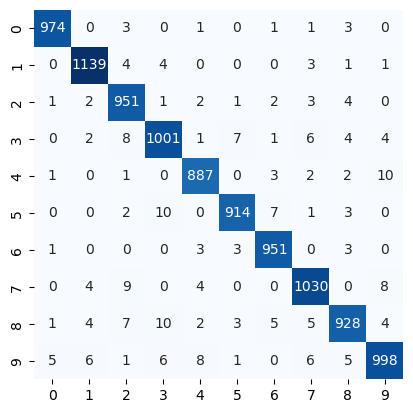

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import seaborn as sns
import numpy as np

# Evaluate accuracy on the test set
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"SVM Accuracy: {accuracy}")
print(f"SVM Precision: {precision}")
print(f"SVM Recall: {recall}")
print(f"SVM F1-Score: {f1}")


cm = confusion_matrix(y_test, y_pred)
#cm = confusion_matrix(true_labels, predictions)

#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

In [11]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning with GridSearchCV for SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Display the best parameters
print(f"Best Parameters for SVM: {grid_search.best_params_}")


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 
                 'max_depth': [10, 20, 30]}

# Perform grid search with cross-validation
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3,n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

Best parameters for Random Forest: {'max_depth': 30, 'n_estimators': 200}


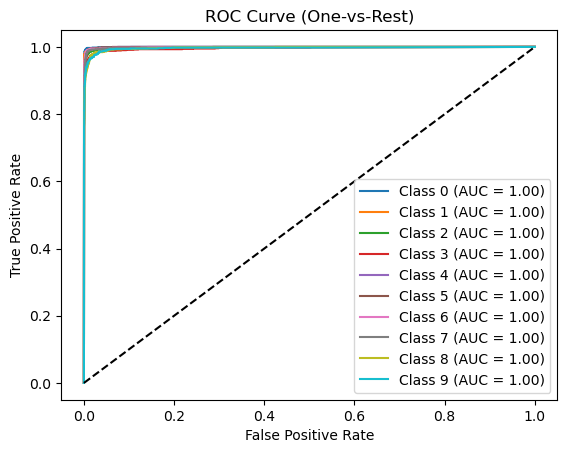

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Binarize the output labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_bin.shape[1]

# One-vs-Rest (OvR) ROC curve for Random Forest (example)
classifier = OneVsRestClassifier(SVC())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


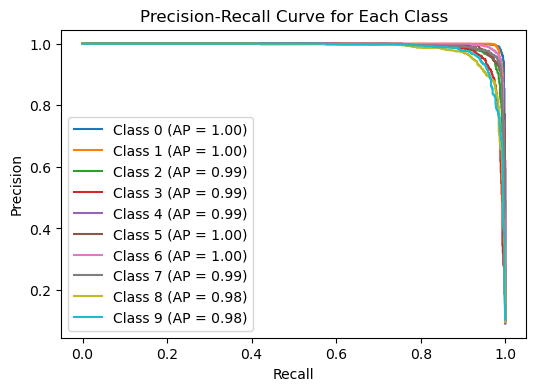

In [18]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate Precision-Recall curves and Average Precision (AP) for each class
plt.figure(figsize=(6, 4))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f"Class {i} (AP = {average_precision_score(y_test_bin[:, i], y_score[:, i]):.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc="lower left")
plt.show()
